In [1]:
import pandas as pd
import matplotlib as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import math
from sklearn import metrics
from matplotlib import *
import sys
from pylab import *

# Importing Data


These datasets are meteorological data from the HI-SEAS weather station from four months (September through December 2016) between Mission IV and Mission V and contain fields such as solar radiation, temperature, humidity, etc. In this assignment I tried to predict the temperature given the values for solar radiation, humidity, wind direction, speed and pressure and contains approximately 35000 entries.

Dataset Link: https://www.kaggle.com/dronio/SolarEnergy

In [2]:
solar_data=pd.read_csv("SolarPrediction.csv")

In [3]:
solar_data.head()

,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed
0,1.21,48,30.46,59,177.39,5.62
1,1.21,48,30.46,58,176.78,3.37
2,1.23,48,30.46,57,158.75,3.37
3,1.21,48,30.46,60,137.71,3.37
4,1.17,48,30.46,62,104.95,5.62


# Descriptive Analysis 

In [4]:
solar_data.describe()

,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed
count,32686.000000,32686.000000,32686.000000,32686.000000,32686.000000,32686.000000
mean,207.124697,51.103255,30.422879,75.016307,143.489821,6.243869
std,315.916387,6.201157,0.054673,25.990219,83.167500,3.490474
min,1.110000,34.000000,30.190000,8.000000,0.090000,0.000000
25%,1.230000,46.000000,30.400000,56.000000,82.227500,3.370000
50%,2.660000,50.000000,30.430000,85.000000,147.700000,5.620000
75%,354.235000,55.000000,30.460000,97.000000,179.310000,7.870000
max,1601.260000,71.000000,30.560000,103.000000,359.950000,40.500000


# Checking for null values in the dataset

In [5]:
solar_data.isnull().sum()

Radiation                 0
Temperature               0
Pressure                  0
Humidity                  0
WindDirection(Degrees)    0
Speed                     0
dtype: int64

# Here, the event is Temperature.

In [7]:
col=['Radiation','Pressure','Humidity','WindDirection(Degrees)','Speed']
temp=solar_data['Temperature']

# Creating Samples

In [8]:
sample_df = solar_data.sample(frac=0.1, random_state=17)

# Plotting each of the attributes with Temperature

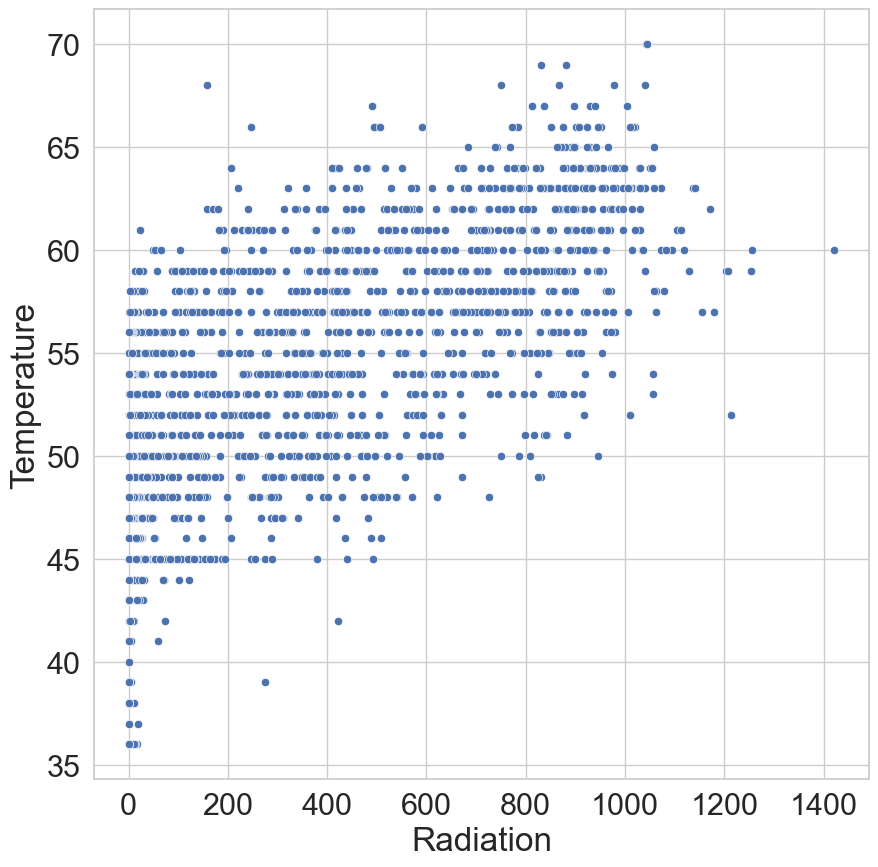

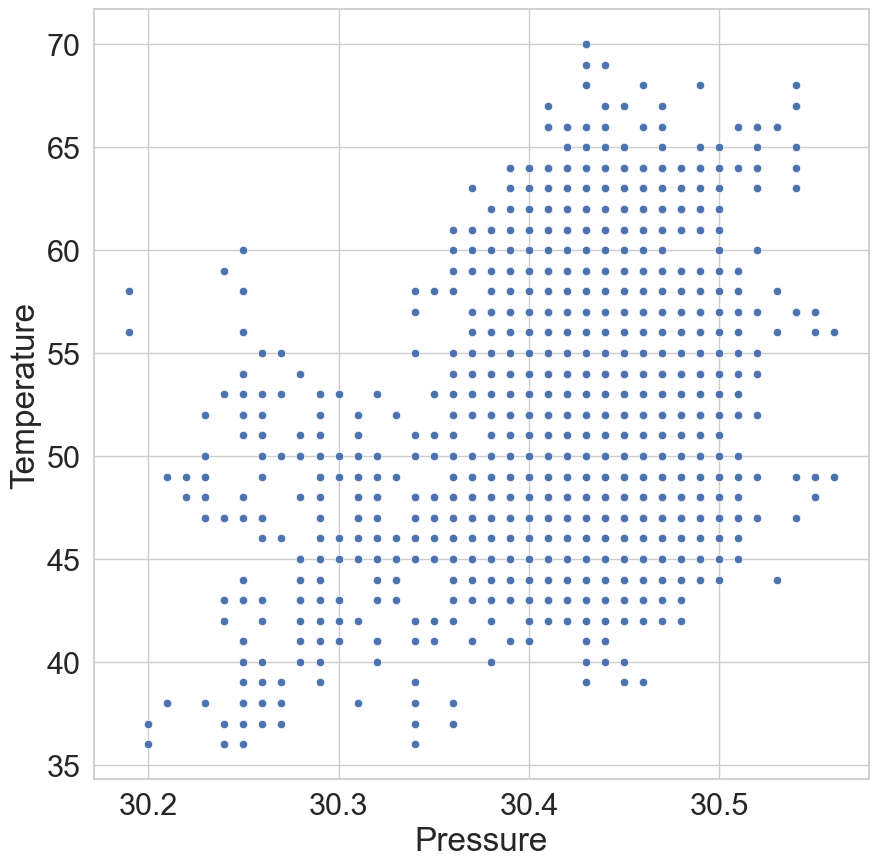

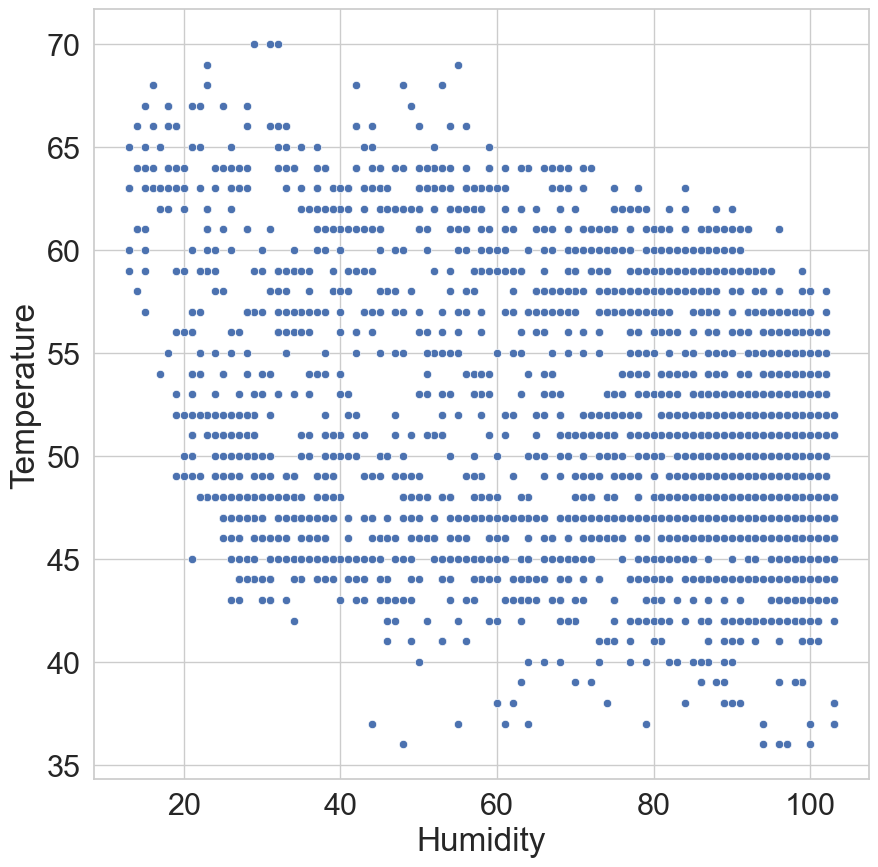

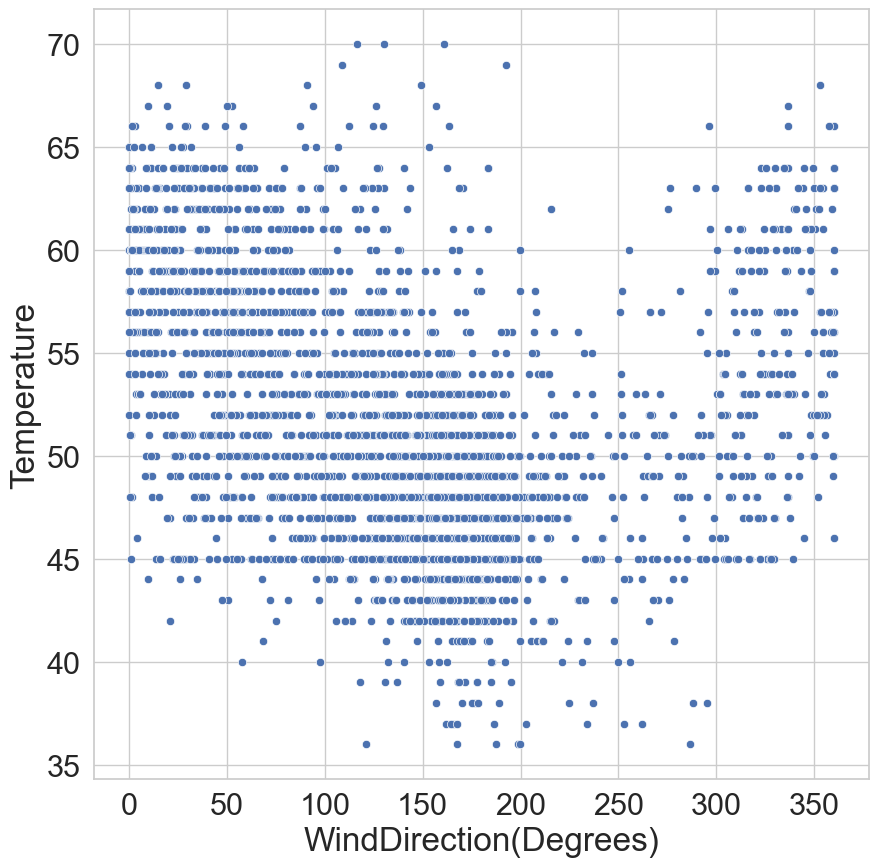

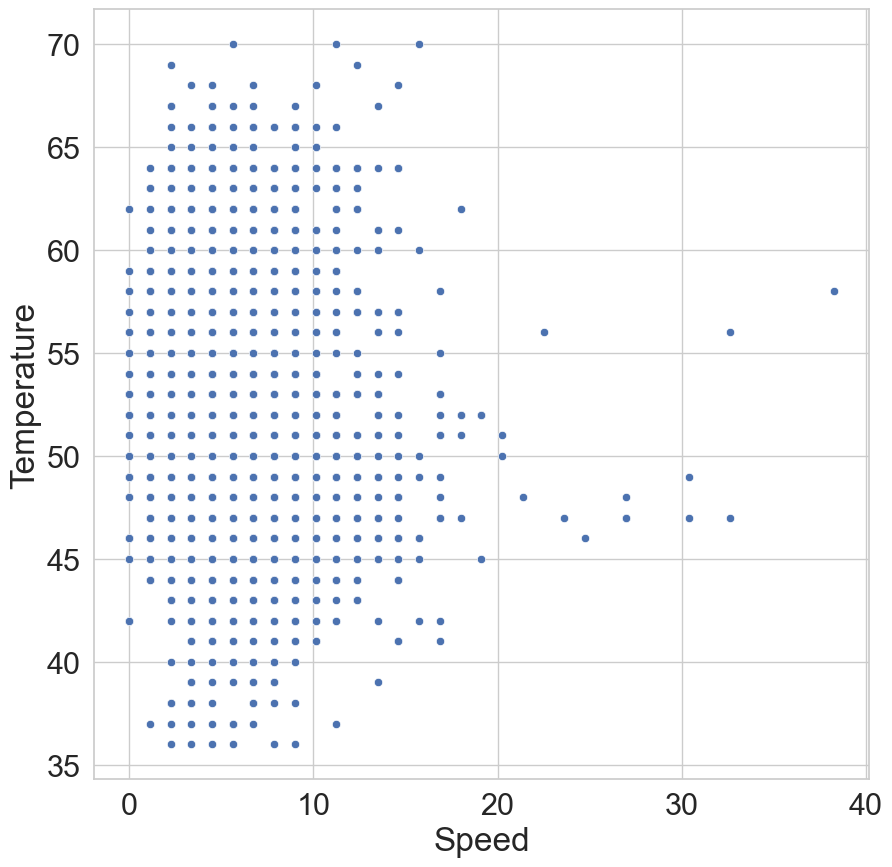

In [9]:
sns.set(font_scale=2)
sns.set_style('whitegrid')
for feature in col:
     plt.figure(figsize=(10, 10))
     sns.scatterplot(data=sample_df, x=feature, y=temp,  
                     palette='cool', legend=False)
plt.show()

In [10]:
plt.close()

# Creating Training and Testing Data

In [11]:
sample_df =solar_data.sample(frac=0.1, random_state=17)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = \
    train_test_split(solar_data, temp, random_state=11)

print(f'Shape of training set = {X_train.shape}')
print(f'Shape of testing  set = {X_test.shape}')

Shape of training set = (24514, 6)
Shape of testing  set = (8172, 6)



# Training the Model

In [12]:
linear_regression = LinearRegression()
linear_regression.fit(X=X_train, y=y_train)

for i, name in enumerate(col):
    print(f'{name:>11}: {linear_regression.coef_[i]:24.20f}') 

print()
print(f'y-intercept: {linear_regression.intercept_:23.20f}')

  Radiation:   0.00000000000000003210
   Pressure:   1.00000000000000044409
   Humidity:   0.00000000000003277480
WindDirection(Degrees):   0.00000000000000015599
      Speed:  -0.00000000000000016177

y-intercept: -0.00000000000101607611


# Testing the Model

In [13]:
predicted = linear_regression.predict(X_test)
expected  = y_test

r2 = metrics.r2_score(expected, predicted)
r  = math.sqrt(r2)

print(f'coefficient of determination = {r2:.1f}')
print(f'     correlation coefficient = {r:.1f}')

coefficient of determination = 1.0
     correlation coefficient = 1.0


# Expected v/s Predicted Temperatures

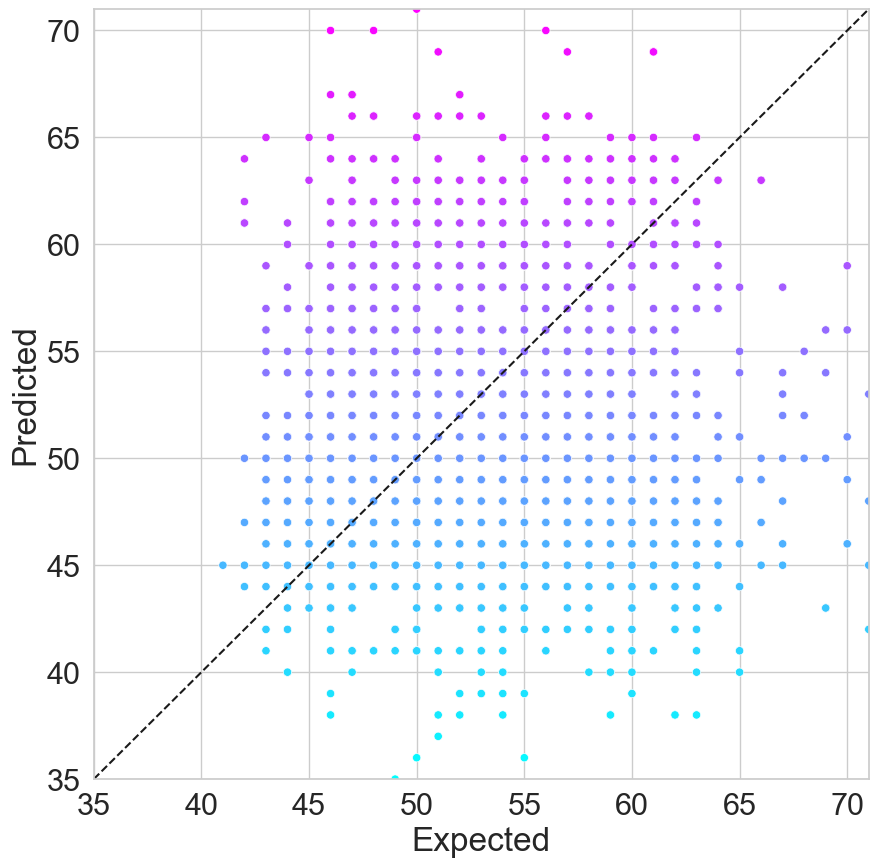

In [14]:
df = pd.DataFrame()

df['Expected']  = pd.Series(expected)
df['Predicted'] = pd.Series(predicted)
figure = plt.figure(figsize=(10, 10))

axes = sns.scatterplot(data=df, x='Expected', y='Predicted', 
                       hue='Predicted', palette='cool', 
                       legend=False)


start = min(expected.min(), predicted.min())
end   = max(expected.max(), predicted.max())

axes.set_xlim(start, end)
axes.set_ylim(start, end)

line = plt.plot([start, end], [start, end], 'k--')
plt.show()

# Conclusion

On analysing the different degrees of correlation of Temperature with all the other attributes, it is observed that Temperature is in perfect correlation with Pressure with a coefficient of 1.00000000000000044409 which indicates that an increase in one of these values will result in an increase of the other. 

Temperature has the next greatest correlation with Humidity (0.00000000000003277480) hence an increase in temperature will cause a decrease in the levels of humidity and a decrease in the temperature will lead to increased humidity.

I belived solar radiation would have a greater correlation with temperature but it turns out that it is one of the least correlated features(0.00000000000000003210). 

Temperature seems to have the smallest correlation with Speed(-0.00000000000000016177).

The coefficient of determination for this model comes out to be 1, indicating a perfect fit.
